<a href="https://colab.research.google.com/github/gandirakesh/AIML-2025_B11/blob/main/2303A51721_11_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of obesity levels based on eating habits
1. Identify the top 5 reasons for obesity levels
2. Identify the age group with most obesity
3. Find the max and min weight of patient with obesity
4. Name the top 5 eating habits contributing to obesity
5. Identify the highest usage of tech gadgets among obese patients.
6. Apply either Classification Model or Clustering Model to evaluate the dataset

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [26]:
file_path = 'ObesityDataSet.csv'
data = pd.read_csv(file_path)

In [25]:
# Display dataset info
print("Dataset Overview:\n")
print(data.info())
print("\nFirst 5 rows of the dataset:\n")
print(data.head())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF            

In [29]:
# 1. Top 5 Reasons for Obesity Levels (Feature Importance)
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)
print("\nTop 5 Reasons for Obesity Levels:\n", top_features)


Top 5 Reasons for Obesity Levels:
        Feature  Importance
2       Weight    0.290146
0          Age    0.106887
1       Height    0.090433
3         FCVC    0.086890
8  Gender_Male    0.055873


In [30]:
# 2. Identify the age group with most obesity
data['AgeRange'] = pd.cut(data['Age'], bins=[0, 18, 30, 50, 100], labels=['Children', 'Young Adults', 'Adults', 'Seniors'])
obesity_by_age = data.groupby('AgeRange')['NObeyesdad'].value_counts().unstack()
print("\nObesity Levels by Age Group:\n", obesity_by_age)


Obesity Levels by Age Group:
 NObeyesdad    Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
AgeRange                                                           
Children                       80             68              39   
Young Adults                  189            201             226   
Adults                          3             16              85   
Seniors                         0              2               1   

NObeyesdad    Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
AgeRange                                                              
Children                    0                 1                  31   
Young Adults              187               323                 216   
Adults                    110                 0                  42   
Seniors                     0                 0                   1   

NObeyesdad    Overweight_Level_II  
AgeRange                           
Children                       22  
Young Adults             

<ipython-input-30-ed0361ed27cc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obesity_by_age = data.groupby('AgeRange')['NObeyesdad'].value_counts().unstack()


In [31]:
# 3. Find the max and min weight of patients with obesity
max_weight = data['Weight'].max()
min_weight = data['Weight'].min()
print(f"\nMaximum Weight of Patients with Obesity: {max_weight}")
print(f"Minimum Weight of Patients with Obesity: {min_weight}")


Maximum Weight of Patients with Obesity: 173.0
Minimum Weight of Patients with Obesity: 39.0


In [34]:
# 4. Top 5 Eating Habits Contributing to Obesity
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
top_eating_habits = correlation_matrix['Weight'].sort_values(ascending=False).head(5)
print("\nTop 5 Eating Habits Contributing to Obesity:\n", top_eating_habits)


Top 5 Eating Habits Contributing to Obesity:
 Weight    1.000000
Height    0.463136
FCVC      0.216125
Age       0.202560
CH2O      0.200575
Name: Weight, dtype: float64


In [38]:
# 5. Identify the highest usage of tech gadgets among obese patients

data['FAVC_Numeric'] = data['FAVC'].map({'yes': 1, 'no': 0})

gadget_use = data.groupby('NObeyesdad')['FAVC_Numeric'].mean()
print("\nAverage Technology Usage by Obesity Level:\n", gadget_use)


Average Technology Usage by Obesity Level:
 NObeyesdad
Insufficient_Weight    0.812500
Normal_Weight          0.724739
Obesity_Type_I         0.968661
Obesity_Type_II        0.976431
Obesity_Type_III       0.996914
Overweight_Level_I     0.924138
Overweight_Level_II    0.744828
Name: FAVC_Numeric, dtype: float64


In [39]:
# 6. Apply Classification Model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Model Accuracy:\n", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Model Accuracy:
 0.9258675078864353

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94        86
      Normal_Weight       0.78      0.89      0.83        93
     Obesity_Type_I       0.97      0.93      0.95       102
    Obesity_Type_II       0.97      0.99      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.89      0.84      0.87        88
Overweight_Level_II       0.95      0.90      0.92        79

           accuracy                           0.93       634
          macro avg       0.93      0.92      0.93       634
       weighted avg       0.93      0.93      0.93       634



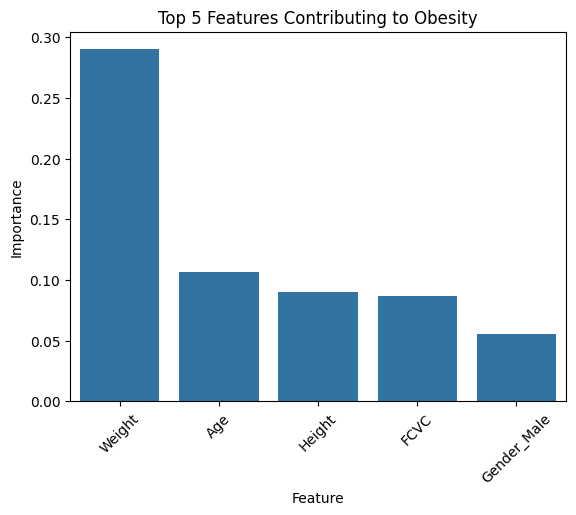

In [40]:
# Visualization
sns.barplot(x='Feature', y='Importance', data=top_features)
plt.title('Top 5 Features Contributing to Obesity')
plt.xticks(rotation=45)
plt.show()